In [1]:
import numpy as np
import pandas as pd
for i in [np, pd]:
    print(i.__name__, i.__version__)

numpy 1.18.5
pandas 0.25.1


In [2]:
df_space = pd.read_csv('data/space_titanic.csv')
df_space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# PassenserId를 _ 을 기준으로 두개의 열로 나누어,
# 첫번째는 pid_1, 다른 하나는 pid_2라는 컬렴명으로 df_space에 추가합니다
df_space[['pid_1', 'pid_2']] = df_space['PassengerId'].str.split('_', expand=True)
df_space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,pid_1,pid_2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


# Pivot

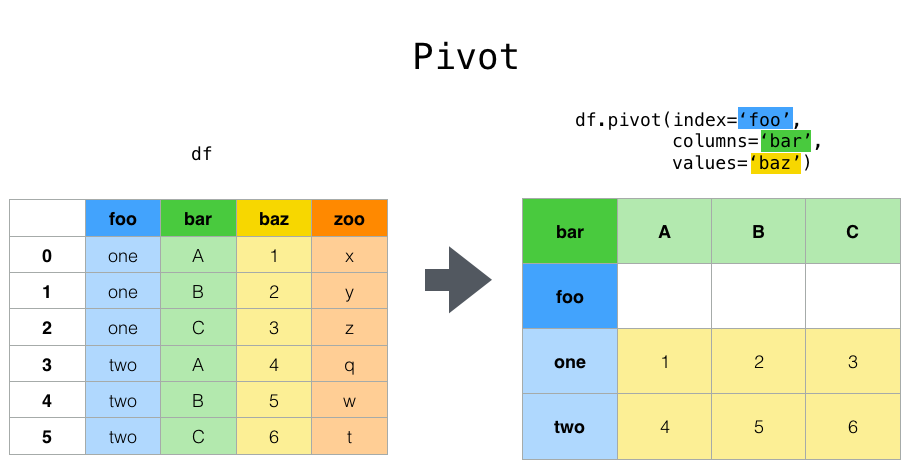

**pd.DataFrame.pivot(self, index=None, columns=None, values=None)**

index: str, list

    인덱스의 요소로 배치할  컬럼

columns: str, list
    
    컬럼의 요소로 배치항 컬럼
    
values: str, list

    인덱스와 컬럼에 따라 배치할 값
    
※ Pivot의 index와 columns에 대응하는 values 가 없다면 NaN이 되지만, 여러 개라면 에러가 발생합니다.

In [4]:
# HomePlanet, Destination에 대응하는 Age가 여러개라 에러가 발생합니다.
df_space.pivot(index='HomePlanet', columns='Destination', values='Age')

ValueError: Index contains duplicate entries, cannot reshape

In [5]:
# pivot_table을 사용하여 대응하는 Age 값을 대표하는 값으로 집계해야 합니다.
df_space.pivot_table(index='HomePlanet', columns='Destination', values='Age', aggfunc=lambda x: x.quantile(0.25))

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,14.25,18.0,18.0
Europa,26.00,30.0,26.0
Mars,19.00,30.0,20.0


## Case 1

    다음과 같이 행을 구성하여 합니다. pid_1, pid_2에 대하여 Age 값으로 아래와 같이 데이터프레임을 만드세요, 결측값은 NaN으로 합니다.
    
|pid_2|01|02|03|04|05|06|07|08|
|-----|--|--|--|--|--|--|--|--|
|pid_1|||||||||
|0001|39.0|NaN|NaN|NaN|NaN|NaN|NaN|NaN|
|0002|24.0|NaN|NaN|NaN|NaN|NaN|NaN|NaN|
|0003|58.0|33.0|NaN|NaN|NaN|NaN|NaN|NaN|
...


In [6]:
df_space.pivot(index='pid_1', columns='pid_2', values='Age')

pid_2,01,02,03,04,05,06,07,08
pid_1,,,,,,,,
0001,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003,58.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN
0004,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0005,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9275,0.0,32.0,30.0,NaN,NaN,NaN,NaN,NaN
9276,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9278,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Stack

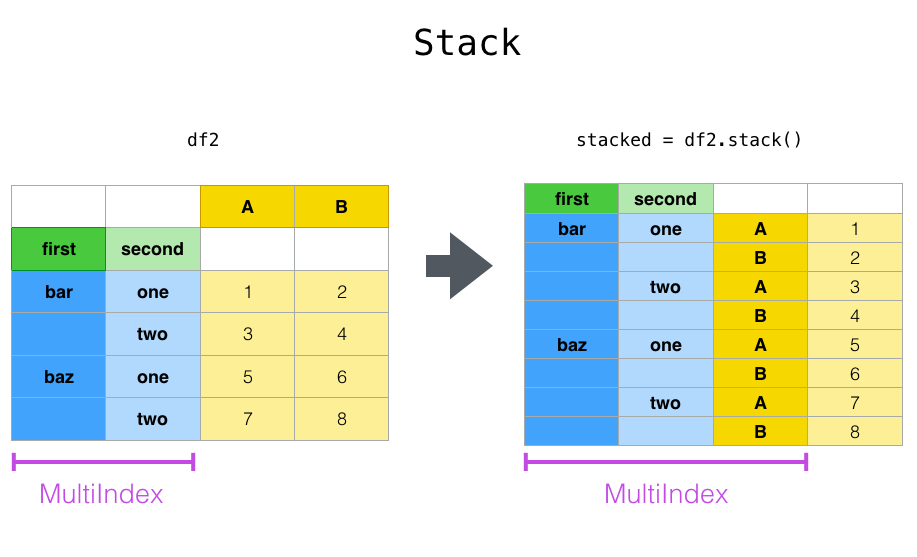

**pd.DataFrame.stack(self, level=-1, dropna=True)**

level: int, str

    stack할 컬럼

## Case 1

HomePlanet, Destination 별로 Transported 가 True 인 관측수와, False 인 관측수를 구하세요.

```python
cols_spend = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_spend = df_space.groupby(['HomePlanet', 'Destination'])[cols_spend].agg(['mean', 'std'])
```

위 구문을 실행하면 생기는 df_spend에서 HomePlanet, Destination 별 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' 각각의 변동계수 ($cv=\frac{s}{\bar{x}}$)를 구하세요.

In [7]:
cols_spend = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_spend = df_space.groupby(['HomePlanet', 'Destination'])[cols_spend].agg(['mean', 'std'])
df_spend

RoomService                 FoodCourt               \
                                mean          std         mean          std   
HomePlanet Destination                                                        
Earth      55 Cancri e    143.392647   440.215151   126.540984   339.831953   
           PSO J318.5-22   71.185879   231.741649    86.187411   289.493670   
           TRAPPIST-1e    148.782293   389.619455   149.514154   387.822162   
Europa     55 Cancri e    145.276060   755.388086  1665.122989  3584.214293   
           PSO J318.5-22  143.111111   588.923433  1594.722222  2525.115205   
           TRAPPIST-1e    149.702055   831.261232  1391.870912  2416.047743   
Mars       55 Cancri e    596.553191  1101.928971    53.439791   205.972751   
           PSO J318.5-22  369.765957   488.471227   107.958333   316.382072   
           TRAPPIST-1e    556.510021   941.410212    53.286408   293.079425   

                         ShoppingMall                       Spa               \
                                 mean          std         mean          std   
HomePlanet Destination                                                         
Earth      55 Cancri e     129.994056   333.550096   126.855030   422.200658   
           PSO J318.5-22    96.991354   300.776263    90.354376   324.460444   
           TRAPPIST-1e     142.441215   358.095702   157.675239   428.691356   
Europa     55 Cancri e     127.478060   632.994051   842.822917  2144.593842   
           PSO J318.5-22   104.631579   312.340486  1188.947368  3331.996657   
           TRAPPIST-1e     173.183391  1088.714130   836.385604  1957.186699   
Mars       55 Cancri e     405.554348   988.578102    94.284211   356.657993   
           PSO J318.5-22   379.428571   512.973156   120.500000   301.040183   
           TRAPPIST-1e     295.650104   607.543888   110.107415   404.044937   

                               VRDeck               
                                 mean          std  
HomePlanet Destination                              
Earth      55 Cancri e     108.545319   306.538117  
           PSO J318.5-22   119.952924   353.178214  
           TRAPPIST-1e     148.820139   386.352372  
Europa     55 Cancri e     921.164937  2246.433055  
           PSO J318.5-22  1072.578947  1933.865798  
           TRAPPIST-1e     845.478669  2040.292319  
Mars       55 Cancri e      70.005291   222.797960  
           PSO J318.5-22    66.145833   199.441560  
           TRAPPIST-1e      44.933380   210.603491

In [8]:
df_spend.stack(level=0).apply(lambda x: x['std'] / x['mean'], axis=1).rename('cv')

HomePlanet  Destination                
Earth       55 Cancri e    FoodCourt       2.685549
                           RoomService     3.069998
                           ShoppingMall    2.565887
                           Spa             3.328214
                           VRDeck          2.824057
            PSO J318.5-22  FoodCourt       3.358886
                           RoomService     3.255444
                           ShoppingMall    3.101063
                           Spa             3.590977
                           VRDeck          2.944307
            TRAPPIST-1e    FoodCourt       2.593883
                           RoomService     2.618722
                           ShoppingMall    2.513989
                           Spa             2.718825
                           VRDeck          2.596103
Europa      55 Cancri e    FoodCourt       2.152522
                           RoomService     5.199674
                           ShoppingMall    4.965514
                        

# Unstack

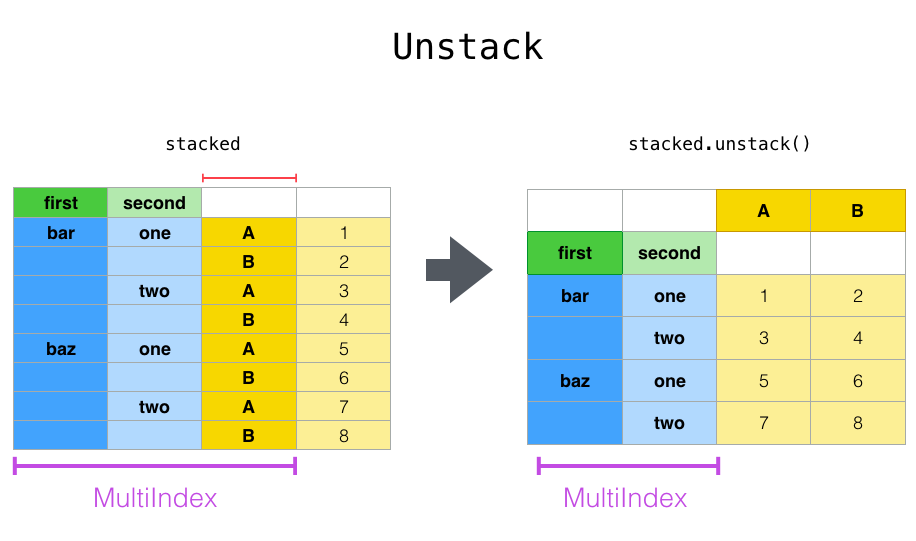

**pd.DataFrame.unstack(self, level=-1, dropna=True)**

level: int, str

    unstack할 인덱스

## Case 1

위에서 구한 변동계수를 다시 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' 항목을 컬럼으로 재구성하세요.

In [9]:
df_spend.stack(level=0).apply(lambda x: x['std'] / x['mean'], axis=1).rename('cv')\
        .unstack()

FoodCourt  RoomService  ShoppingMall       Spa  \
HomePlanet Destination                                                     
Earth      55 Cancri e     2.685549     3.069998      2.565887  3.328214   
           PSO J318.5-22   3.358886     3.255444      3.101063  3.590977   
           TRAPPIST-1e     2.593883     2.618722      2.513989  2.718825   
Europa     55 Cancri e     2.152522     5.199674      4.965514  2.544537   
           PSO J318.5-22   1.583420     4.115148      2.985145  2.802476   
           TRAPPIST-1e     1.735827     5.552771      6.286481  2.340053   
Mars       55 Cancri e     3.854296     1.847160      2.437597  3.782797   
           PSO J318.5-22   2.930594     1.321028      1.351962  2.498259   
           TRAPPIST-1e     5.500078     1.691632      2.054942  3.669552   

                            VRDeck  
HomePlanet Destination              
Earth      55 Cancri e    2.824057  
           PSO J318.5-22  2.944307  
           TRAPPIST-1e    2.596103  
Europa     55 Cancri e    2.438687  
           PSO J318.5-22  1.803006  
           TRAPPIST-1e    2.413180  
Mars       55 Cancri e    3.182587  
           PSO J318.5-22  3.015179  
           TRAPPIST-1e    4.687016

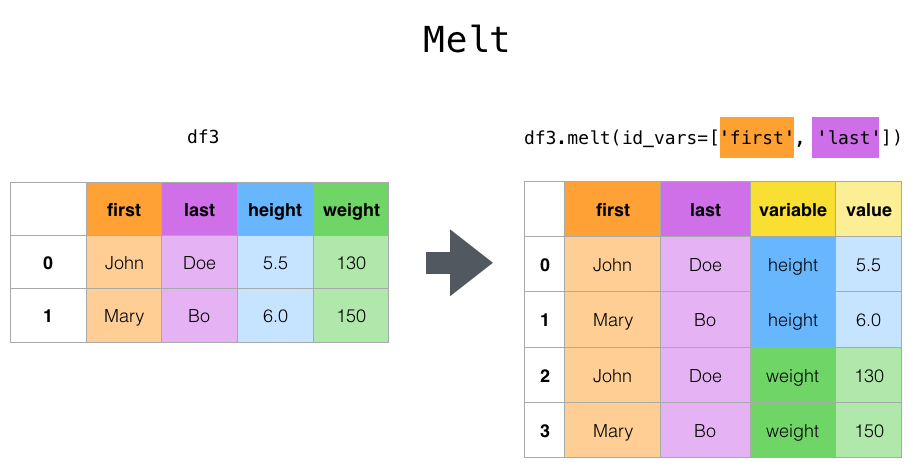

**pd.DataFrame.melt(self, id_vars=None, value_vars=None, var_name,  value_name='', col_level=None)**

id_vars: str, list

    melt된 컬럼 별로 대응이 될 기준 컬럼
    
value_vars: str, list
    
    melt 될 항목
 
var_name: str

    value_vars에 속하는 컬럼으로 형성된 컬럼에 이름
    
value_name: str

    value_var에 속하는 컬럼 값으로 형성된 컬럼의 이름

## Case 1

df_space를 바탕으로 아래와  같이 구성된 데이터프레임을 만드세요.

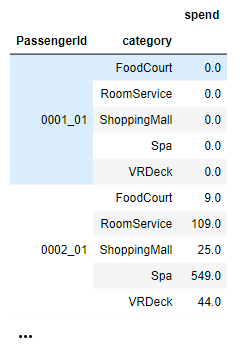

In [10]:
df_space.melt(id_vars='PassengerId', 
  value_vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
  var_name='category', value_name='spend'
 ).sort_values(['PassengerId', 'category']).set_index(['PassengerId', 'category'])

spend
PassengerId category            
0001_01     FoodCourt        0.0
            RoomService      0.0
            ShoppingMall     0.0
            Spa              0.0
            VRDeck           0.0
...                          ...
9280_02     FoodCourt     4688.0
            RoomService    126.0
            ShoppingMall     0.0
            Spa              0.0
            VRDeck          12.0

[43465 rows x 1 columns]